In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import seaborn as sns
from sklearn.metrics import confusion_matrix
heart_df=pd.read_csv('heart.csv')

In [2]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
heart_df.shape

(303, 14)

In [5]:
cols=heart_df.columns
len(cols)

14

In [6]:
x_data=heart_df[cols[0:13]]
y_data=heart_df[cols[13]]

In [7]:
x_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y_data.iloc[160:170]

160    1
161    1
162    1
163    1
164    1
165    0
166    0
167    0
168    0
169    0
Name: target, dtype: int64

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2)

In [10]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [11]:
y_train.head()

215    0
8      1
37     1
203    0
157    1
Name: target, dtype: int64

In [12]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3


In [13]:
y_test.head()

259    0
160    1
187    0
231    0
168    0
Name: target, dtype: int64

In [14]:
print('Shape of x-train:',x_train.shape)
print('Shape of y-train:',y_train.shape)
print('Shape of x-test',x_test.shape)
print('Shape of y-test',y_test.shape)

Shape of x-train: (242, 13)
Shape of y-train: (242,)
Shape of x-test (61, 13)
Shape of y-test (61,)


In [15]:
hrt=LogisticRegression()
hrt.fit(x_train,y_train)

/home/adminsys/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
hrt.score(x_test,y_test)

0.8688524590163934

In [17]:
joblib.dump(hrt,'heart_model')

['heart_model']

In [18]:
model=joblib.load('heart_model')
pred=model.predict(x_test)

In [19]:
actual=np.array(y_test)

In [20]:
c_matrix=confusion_matrix(actual,pred)

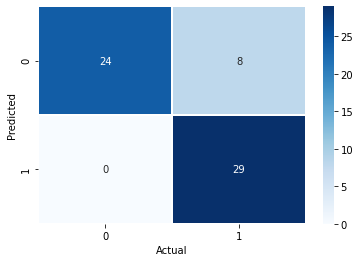

In [21]:
%matplotlib inline
graph=sns.heatmap(c_matrix,annot=True,cbar=True,cmap=plt.cm.Blues,linewidths=1)
graph.set_xlabel('Actual')
graph.set_ylabel('Predicted')
plt.show()